# 2. Python

We will be using the following PyData Tools for the Exercises:

* Pandas: <http://pandas.pydata.org/>
* NumPy: <http://www.numpy.org/>
* Scikit-Learn: <http://scikit-learn.org/>

This tutorial is based on:


* Wes McKinnedy, Python for Data Analysis, 2nd Editions, <https://github.com/wesm/pydata-book>
* <https://github.com/jonathanrocher/pandas_tutorial/blob/master/analyzing_and_manipulating_data_with_pandas_manual.pdf>




# 2.1 Tutorial

Follow and execute the Examples Notebooks in the Folder:

* Python and iPython Introduction
* Python Data Structures
* Pandas Tour
* NumPy Tour

# 2.2 Practical Exercise

Use the Iris dataset from the scikit-learn Dataset API to solve the following tasks:
1. How many flowers of each kind are in the dataset!
2. What is the average and stdev of all four attributes for all flowers and per flower group?
3. Plot the result!

In [1]:
%matplotlib inline
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df.groupby('target_name').aggregate({'target_name':'count', })

,target_name
target_name,
setosa,50
versicolor,50
virginica,50


In [5]:
iris_df.iloc[:,:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
mean_std_df = iris_df.iloc[:,:4].describe().loc[['mean', 'std']]

In [7]:
mean_std_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238


<ErrorbarContainer object of 3 artists>

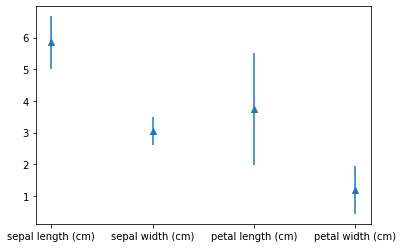

In [8]:
plt.errorbar(mean_std_df.columns, mean_std_df.loc['mean'], mean_std_df.loc['std'], linestyle='None', marker='^')